## Segmentación de imágenes

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Adri\AppData\Local\Temp\ipykernel_9356\1020607637.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
brain_df = pd.read_csv('Brain_MRI/data_mask.csv')

In [3]:
brain_df.head()

,patient_id,image_path,mask_path,mask
0,TCGA_CS_5395_19981004,TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1.tif,TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1_...,0
1,TCGA_CS_5395_19981004,TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1.tif,TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1_...,0
2,TCGA_CS_5395_19981004,TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif,TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1_...,0
3,TCGA_CS_5395_19981004,TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1.tif,TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1_...,0
4,TCGA_CS_5395_19981004,TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1.tif,TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1_...,0


In [4]:
# Ok, la ruta de la imagen para el paciente nº1
brain_df.image_path[1]

'TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1.tif'

In [5]:
brain_df.mask_path[1]

'TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1_mask.tif'

In [6]:
#¿Lo tenemos balanceado?
#¿Cuantas muestras tenemos de "paciente sano"?
brain_df['mask'].value_counts()

mask
0    2556
1    1373
Name: count, dtype: int64

In [7]:
#Vamos a hacer un gráfico interactivo de cuantos hay en el 0, 1
import plotly.graph_objects as go

#Vamos a representar los ejes
x = brain_df['mask'].value_counts().index
y = brain_df['mask'].value_counts()

In [8]:
fig =go.Figure([go.Bar(x=x,y=y)])
fig.show()


In [9]:
# fig =go.Figure([go.Bar(x=x,y=y)])
# fig.show(renderer="browser")


Pues vamos a dibujar nuestras primeras imágenes la imagen 83

In [10]:
%cd Brain_MRI

d:\IA-Github\IA\Programacion_de_Inteligencia_Artificial\UD4\Healthcare\Healthcare_AI_Datasets\Brain_MRI


C:\Users\Adri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\magics\osm.py:417: UserWarning:

using dhist requires you to install the `pickleshare` library.



In [11]:
brain_df.image_path[83]

'TCGA_HT_7884_19980913/TCGA_HT_7884_19980913_1.tif'

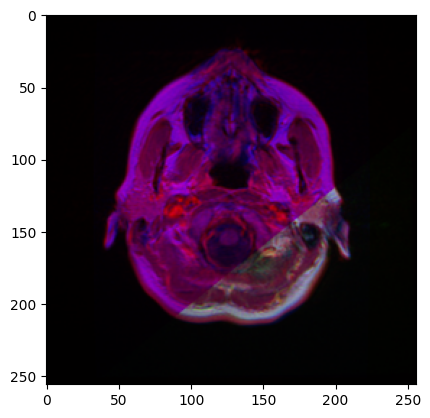

In [12]:
import cv2
plt.imshow(cv2.imread(brain_df.image_path[83]))

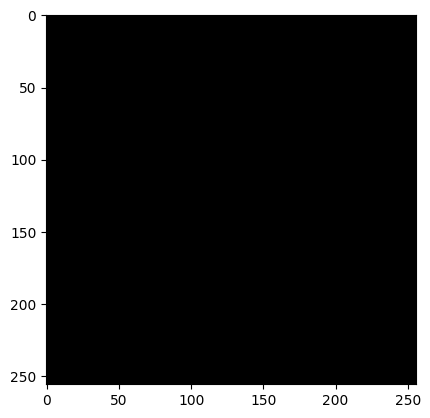

In [13]:
plt.imshow(cv2.imread(brain_df.mask_path[83]))

### Visualización básica
Visualizaremos imágenes (MRI y Máscaras) en el dataset de forma separada 6 x 2



C:\Users\Adri\AppData\Local\Temp\ipykernel_9356\1583130453.py:12: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



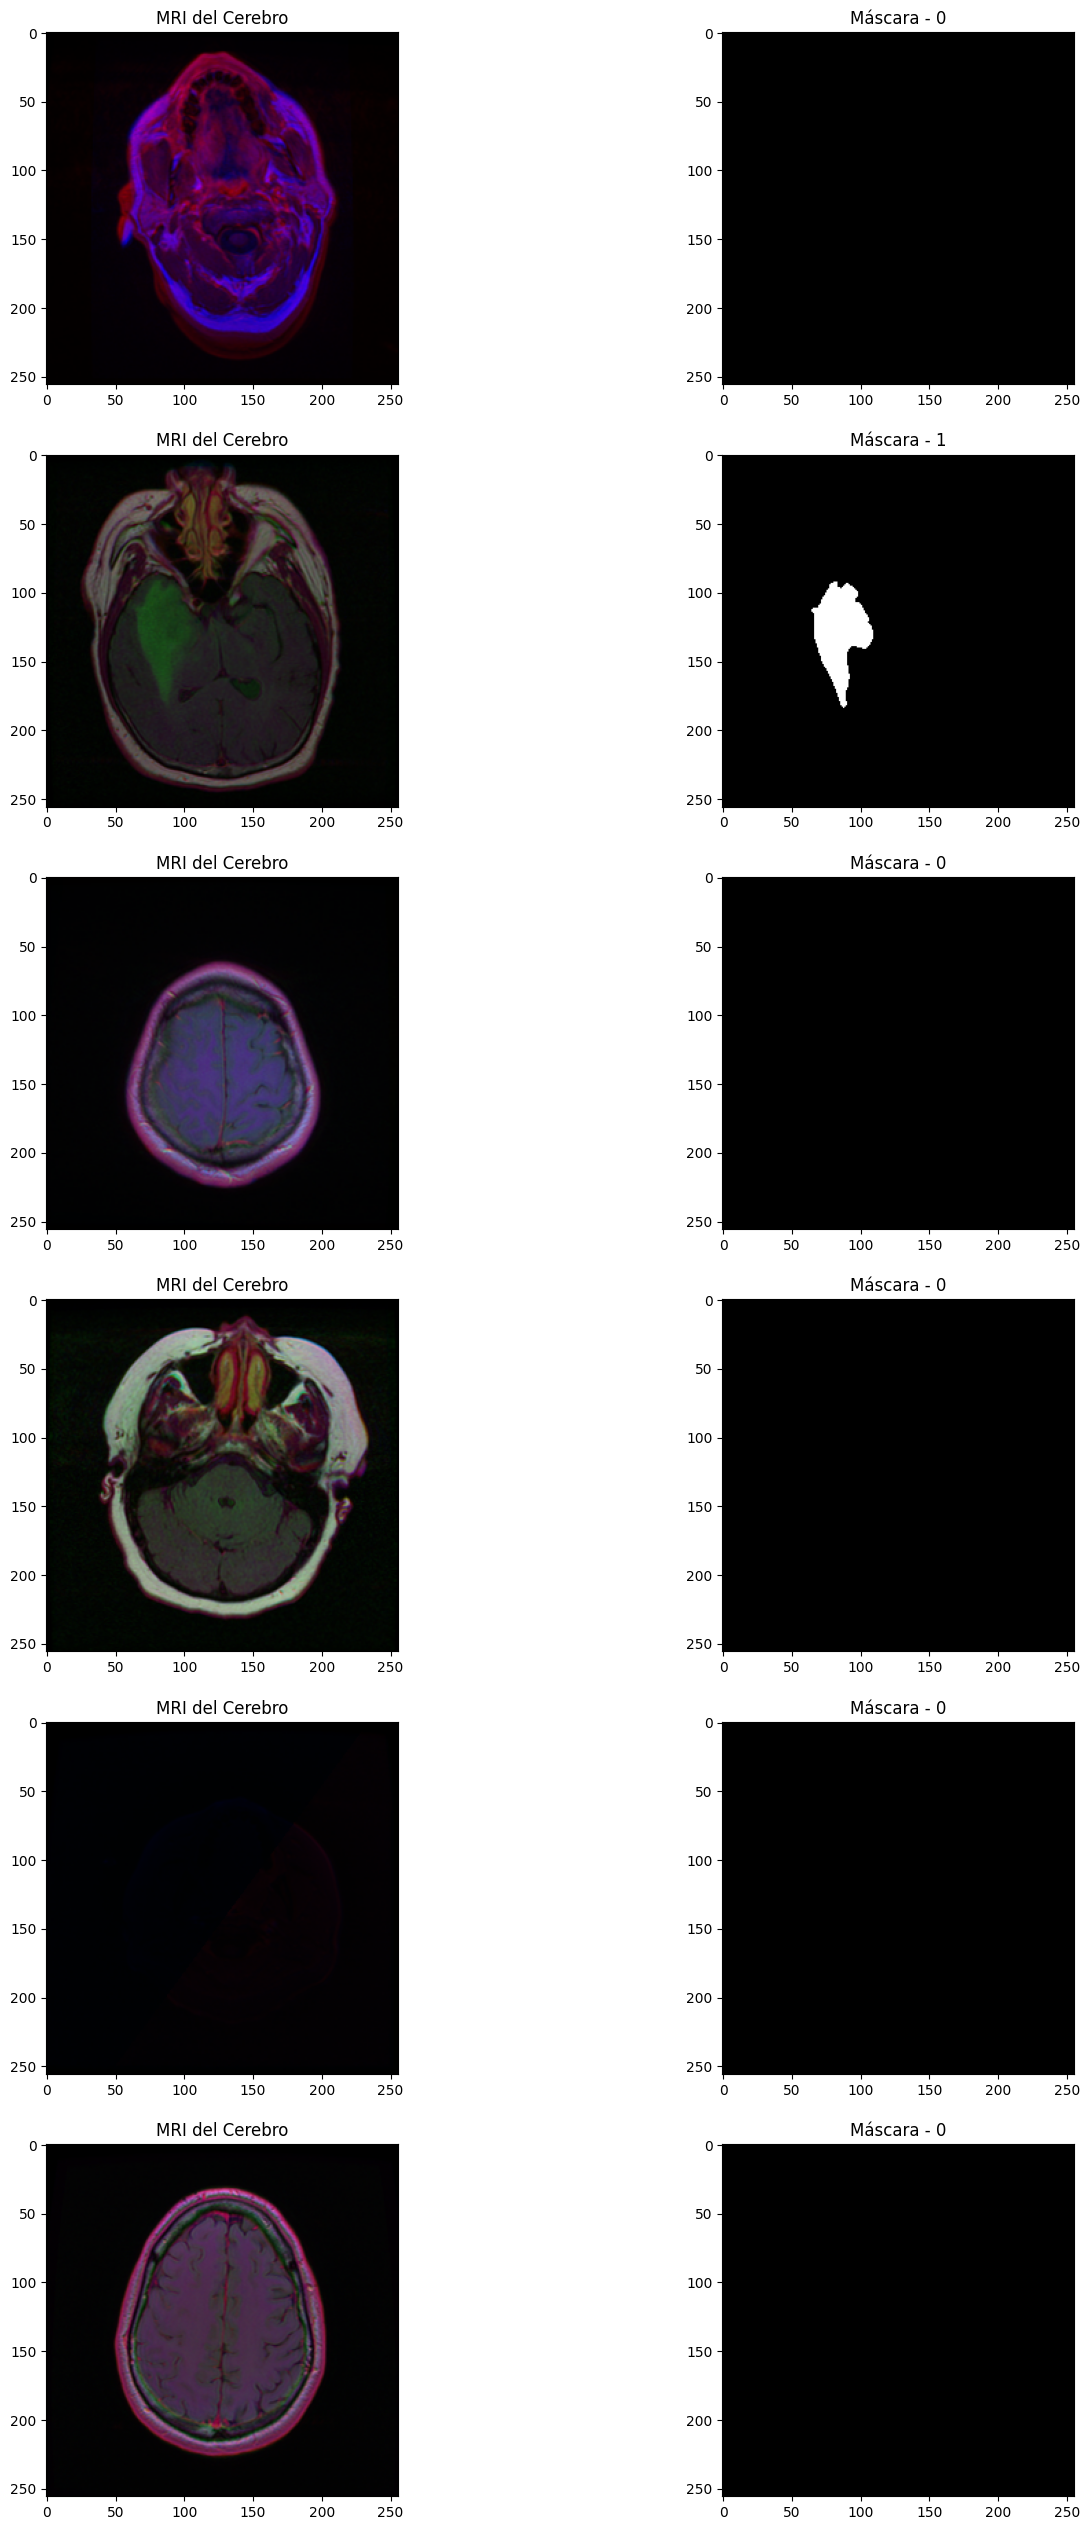

In [14]:
import random
fig, axs = plt.subplots(6,2, figsize=(16,32))
count = 0
for x in range(6):
  i = random.randint(0, len(brain_df)) # Seleccionamos un índice aleatorio
  axs[count][0].title.set_text("MRI del Cerebro") # Configuramos el título
  axs[count][0].imshow(cv2.imread(brain_df.image_path[i])) # Mostramos la MRI
  axs[count][1].title.set_text("Máscara - " + str(brain_df['mask'][i])) # Colocámos el título en la máscara (0 o 1)
  axs[count][1].imshow(cv2.imread(brain_df.mask_path[i])) # Mostramos la máscara correspondiente
  count += 1

fig.show()

In [15]:
def obtener_dataframe():
    brain_df = brain_df
    return brain_df

In [16]:
%store brain_df


Stored 'brain_df' (DataFrame)


C:\Users\Adri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\extensions\storemagic.py:229: UserWarning:

using autorestore/brain_df requires you to install the `pickleshare` library.



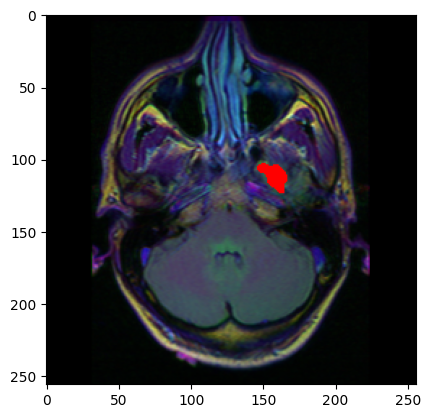

In [17]:
from skimage import io
i=445
img = io.imread(brain_df.image_path[i])
img2 = cv2.imread(brain_df.image_path[i])
mask = io.imread(brain_df.mask_path[i])
mask2 = cv2.imread(brain_df.mask_path[i])
mask2_gray = cv2.cvtColor(mask2, cv2.COLOR_BGR2GRAY)
img[mask2_gray == 255] = (255, 0, 0) # Cambia el color de los píxeles en la imagen donde la máscara es 255
plt.imshow(img)

[TAREA] Representar aleatoriamente 12 imágenes de MRI seleccionadas 
aleatoriamente de entre los pacientes enfermos seguidas de su 
correspondiente máscara, tanto la imagen de la MRI junto con su máscara (de 
color rojo) una encima de la otra.

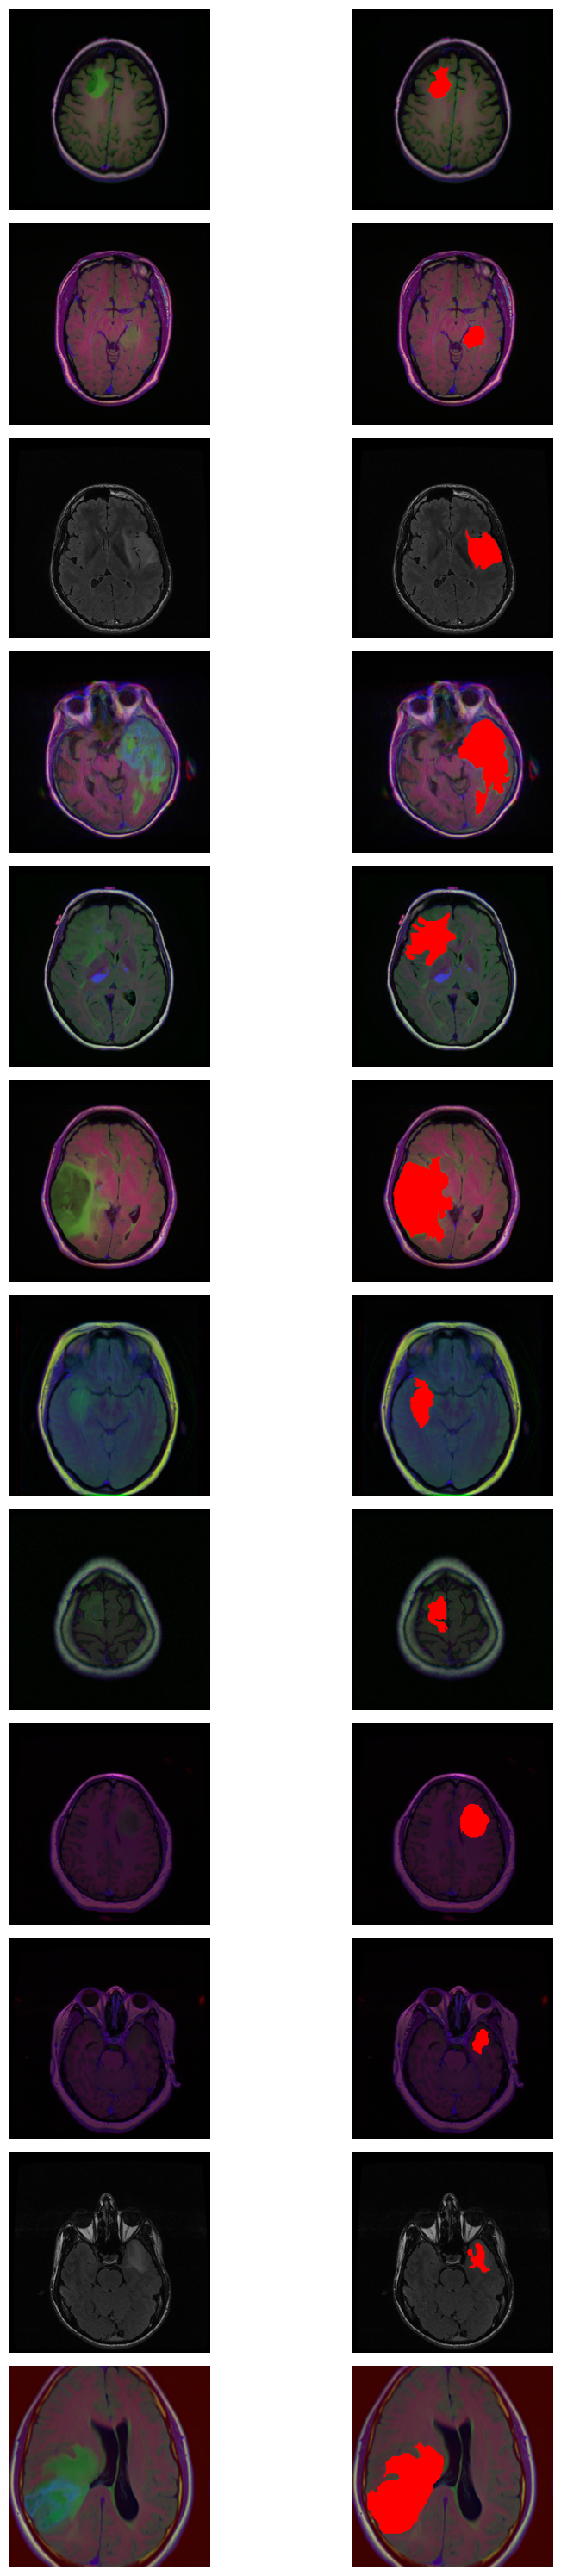

In [18]:
import matplotlib.pyplot as plt
from skimage import io
import numpy as np
import cv2
import random

# Filtrar solo los pacientes enfermos (donde la columna 'mask' es igual a 1)
enfermos_df = brain_df[brain_df['mask'] == 1]

# Seleccionar aleatoriamente 12 pacientes
indices_aleatorios = random.sample(range(len(enfermos_df)), 12)
imagenes_seleccionadas = enfermos_df.iloc[indices_aleatorios]

# Crear subplots
fig, axs = plt.subplots(12, 2, figsize=(10, 30))  # 12 filas, 2 columnas

for i, (idx, row) in enumerate(imagenes_seleccionadas.iterrows()):
    # Leer las imágenes
    img = io.imread(row['image_path'])
    mask = io.imread(row['mask_path'])

    # Convertir la máscara a escala de grises si es necesario
    if len(mask.shape) == 3:
        mask_gray = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
    else:
        mask_gray = mask

    # Sobreponer la máscara en rojo
    img_masked = img.copy()
    img_masked[mask_gray == 255] = [255, 0, 0]

    # Mostrar las imágenes
    axs[i, 0].imshow(img)
    axs[i, 1].imshow(img_masked)

    axs[i, 0].axis('off')
    axs[i, 1].axis('off')

plt.tight_layout()
plt.show()


[TAREA] Entender la teoría y la intuición detrás de las redes neuronales y 
resnets convolucionales. Mira la teoría y resúmelo con tus palabras.

[TAREA] Entender la teoría y la intuición detrás del aprendizaje por 
transferencia. Mira la teoría y resúmelo con tus palabras.

[TAREA] Enumere los desafíos del aprendizaje por transferencia (se requiere investigación externa)

Algunos de los desafíos para el aprendizaje por transferencia son:

- Desajuste de dominio: Puede que el modelo haya sido entrenado con otros datos irrelevantes
- Sobreajuste: Hay que recopilar exactamente los datos necesarios ya que entrenar al modelo con datos de más podría hacer que memorizase en lugar de aprender.
- Selección de capas para reentrenamiento: Hay que saber que capas reentrenar ya que reentrenar capas no necesarios podría crear un sobreajuste y reentrenar pocas capas podría no ser suficiente para que el modelo aprenda.
- Balance entre aprendizaje nuevo y conservación del conocimiento: Uno de los mayores desafíos es que haya un equilibrio entre el conocimiento antiguo y el conocimiento nuevo. Para ello habría que ajustar el learning rate

In [19]:
# Eliminamos la columna de identificador del paciente 
brain_df_train = brain_df.drop(columns = ['patient_id']) 
brain_df_train.shape 

(3929, 3)

Spiler. Convertir los datos en la columna de máscara a formato de string, para usar el 
modo categórico en flow_from_dataframe (Podemos no hacerlo, a ver si os da error 
luego. OJO! Tenedlo en cuenta)

In [20]:
# Convertir la columna 'mask' a formato de string
brain_df_train['mask'] = brain_df_train['mask'].astype(str)

In [21]:
# Verificar los cambios
print(brain_df_train.head())

                                          image_path  \
0  TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1.tif   
1  TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1.tif   
2  TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif   
3  TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1.tif   
4  TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1.tif   

                                           mask_path mask  
0  TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1_...    0  
1  TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1_...    0  
2  TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1_...    0  
3  TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1_...    0  
4  TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1_...    0  


Dividimos datos train, test 0.15

In [22]:
from sklearn.model_selection import train_test_split

# Dividir en conjunto de entrenamiento y de prueba
train, test = train_test_split(brain_df_train, test_size=0.15, random_state=42)

# Verificar el tamaño de los conjuntos
print(f"train shape: {train.shape}")
print(f"test shape: {test.shape}")


train shape: (3339, 3)
test shape: (590, 3)


Instalar todas las funcionalidades de Keras Preprocessing

In [23]:
%pip install Keras-Preprocessing

Note: you may need to restart the kernel to use updated packages.


Importamos  datagenerator

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Vale, Creamos un generador de datos que escale los datos de 0 a 1 y haga una 
división de validación de 0,15.

In [25]:
datagen = ImageDataGenerator(rescale=1./255., validation_split = 0.15) 

train_generator=datagen.flow_from_dataframe( 
dataframe=train, 
directory= './', 
x_col='image_path', 
y_col='mask', 
subset="training", 
batch_size=16, 
shuffle=True, 
class_mode="categorical", 
target_size=(256,256)) 
 
valid_generator=datagen.flow_from_dataframe( 
dataframe=train, 
directory= './', 
x_col='image_path', 
y_col='mask', 
subset="validation", 
batch_size=16, 
shuffle=True, 
class_mode="categorical", 
target_size=(256,256)) 
 
# Creamos un generador de datos para imágenes de prueba 
test_datagen=ImageDataGenerator(rescale=1./255.) 
 
test_generator=test_datagen.flow_from_dataframe( 
dataframe=test, 
directory= './', 
x_col='image_path', 
y_col='mask', 
batch_size=16, 
shuffle=False, 
class_mode='categorical', 
target_size=(256,256))

Found 2839 validated image filenames belonging to 2 classes.
Found 500 validated image filenames belonging to 2 classes.
Found 590 validated image filenames belonging to 2 classes.


Obtenemos el modelo de base. Haz summary

In [28]:
from keras.applications import ResNet50
from keras.layers import Input

In [29]:
basemodel = ResNet50(weights = 'imagenet', include_top = False, input_tensor = Input(shape=(256, 256, 3)))



94765736/94765736 [==============================] - 8s 0us/step
